# Lab 4 (30-01-2024)

This lab experiments help you master how to do linear regression and multiple linear regression.

We will be using real estate database provided in lab2.



In [1]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


## Experiment 1 - Predicting diabetes for a person using Linear Regression
Load diabetes dataset
 Split the dataset into

1.  Split the dataset into train (90%) and test (10%) using scikit learn
2.  Fill the cost function
3.  Fill the liner regression fit function
4.  Fill the routine for Gradient descent





In [2]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes(as_frame=True,scaled=True)

dataset_dia = dataset.data

re_df = dataset_dia.copy()

In [3]:
print(re_df.columns)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [4]:
print(dataset.target)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [5]:
categorical_columns = re_df.select_dtypes(include=['object']).columns
numerical_columns = re_df.select_dtypes(exclude=['object']).columns

print(categorical_columns)
print("-------------------")
print(numerical_columns)

Index([], dtype='object')
-------------------
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

X = re_df['age'].to_numpy()
Y = dataset.target.to_numpy()

# split the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [7]:
# Experiment 1 - Linear regression with one variable
# Fill following functions
def linear_reg_function(X,w,b):
  """
  Model function for the
  X is the feature vector
  Y is the target vector "For example: "
  b is the bias
  w is the weight
  """

  return w*X + b

In [8]:
# Experiment 1 - Linear regression with one variable
# Fill following functions

def cost_function(X,w,b,Y):
  """
  Cost function for the linear regression
  This is the function that will be minimised using gradient descent
  X is the feature vector "For example: Area of the house"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight
  """
  cf_val = 0
  m = len(Y)
  for i in range(0,m):
    cf_val += (linear_reg_function(X[i], w, b) - Y[i]) ** 2
  cf_val /= (2*m)
  # Compute the cf_val = sum across all i : (wX_i + b)^2

  return cf_val

In [9]:
# Experiment 1 - Linear regression with one variable
# Fill following functions

def cost_function_with_reg(X,w,b,Y, gamma=0.1):
  """
  Cost function for the linear regression
  This is the function that will be minimised using gradient descent
  X is the feature vector "For example: Area of the house"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight
  """
  cf_val = 0
  m = len(Y)
  for i in range(0,m):
    cf_val += (linear_reg_function(X[i], w, b) - Y[i]) ** 2
  cf_val /= (2*m) + gamma*(w**2 + b**2)
  # Compute the cf_val = sum across all i : (wX_i + b)^2

  return cf_val

In [10]:
# Experiment 1 - Linear regression with one variable
# Fill following functions
def gradient_function(X,w,b,Y):
  """
  Gradient function for the linear regression with one variable
  This is the function that will be used to get the gradient in gradient descent
  X is the feature vector "For example: Area of the house"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight
  """
  grad_val_w = 0.0
  grad_val_b = 0.0
  m = len(Y)

  for i in range(0,m):
    grad_val_w += (linear_reg_function(X[i], w, b) - Y[i])*X[i]
    grad_val_b += (linear_reg_function(X[i], w, b) - Y[i])
  grad_val_w /= (m)
  grad_val_b /= (m)
  # Compute the grad_val_w, grad_val_b for the cost function

  return grad_val_w, grad_val_b

In [11]:
# Experiment 1 - Linear regression with one variable
# Fill following functions
def gradient_function_with_reg(X,w,b,Y, gamma=0.1):
  """
  Gradient function for the linear regression with one variable
  This is the function that will be used to get the gradient in gradient descent
  X is the feature vector "For example: Area of the house"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight
  """
  grad_val_w = 0.0
  grad_val_b = 0.0
  m = len(Y)

  for i in range(0,m):
    grad_val_w += (linear_reg_function(X[i], w, b) - Y[i])*X[i]
    grad_val_b += (linear_reg_function(X[i], w, b) - Y[i])
  grad_val_w /= ((m) + 2*gamma*w)
  grad_val_b /= ((m) + 2*gamma*b)
  # Compute the grad_val_w, grad_val_b for the cost function

  return grad_val_w, grad_val_b

In [12]:
# Experiment 1 - Linear regression with one variable
# Fill following functions

# the below function is a template you may edit it
def gradient_descent_linear_reg_one_variable(X,Y, gradient, learning_rate, bias=1.0, weight=1.0, converge_param=0.1):
  w = weight
  b = bias
  isConverged = False
  num_steps = 1
  while (not isConverged):
    num_steps +=1
    #cs_val = model_func(X,w,b,Y)
    dw, db = gradient(X,w,b,Y)
    w -= learning_rate*dw
    b -= learning_rate*db
    if abs(learning_rate * dw) < converge_param and abs(learning_rate * db) < converge_param:
      isConverged = True
    weight = w
    bias = b
  print("Converged in " , num_steps,  "iterations...")
  return w, b

In [13]:
# Test with different learning rates and start values and see how gradient descent works
print("Linear Regression without Regularization")
print("---------------------------------------------")

print("Using Given Learning Rate")
learning_rate_given = 0.9

print("Using X as the feature and Y as the target")
w_g,b_g = gradient_descent_linear_reg_one_variable(X, Y, gradient_function, learning_rate_given)
print("Weights:", w_g)
print("Bias:", b_g)
print("---------------")
cost_g = cost_function(X, w_g, b_g, Y)
print("Cost:", cost_g)

print("---------------------------------------------")

print("Using X_train as the feature and y_train as the target")
w_t_g,b_t_g = gradient_descent_linear_reg_one_variable(X_train, Y_train, gradient_function, learning_rate_given)
print("Weights:", w_t_g)
print("Bias:", b_t_g)
print("---------------")
cost_g_t = cost_function(X_train, w_t_g, b_t_g, Y_train)
print("Cost:", cost_g_t)
print("---------------------------------------------")

print("Using Ideal Learning Rate")
learning_rate_ideal = 0.01

print("Using X as the feature and Y as the target")
w_i,b_i = gradient_descent_linear_reg_one_variable(X, Y, gradient_function, learning_rate_ideal)
print("Weights:", w_i)
print("Bias:", b_i)
print("---------------")
cost_i = cost_function(X, w_i, b_i, Y)
print("Cost:", cost_i)
print("---------------------------------------------")

print("Using X_train as the feature and y_train as the target")
w_t_i,b_t_i = gradient_descent_linear_reg_one_variable(X_train, Y_train, gradient_function, learning_rate_ideal)
print("Weights:", w_t_g)
print("Bias:", b_t_g)
print("---------------")
cost_i_t = cost_function(X_train, w_t_g, b_t_g, Y_train)
print("Cost:", cost_i_t)


Linear Regression without Regularization
---------------------------------------------
Using Given Learning Rate
Using X as the feature and Y as the target
Converged in  896 iterations...
Weights: 255.2682390675628
Bias: 152.13348416289594
---------------
Cost: 2862.9801388382903
---------------------------------------------
Using X_train as the feature and y_train as the target
Converged in  920 iterations...
Weights: 258.99549805446054
Bias: 152.27937211039938
---------------
Cost: 2852.466928974413
---------------------------------------------
Using Ideal Learning Rate
Using X as the feature and Y as the target
Converged in  273 iterations...
Weights: 2.86003398679479
Bias: 142.31298359649503
---------------
Cost: 3011.2045504905955
---------------------------------------------
Using X_train as the feature and y_train as the target
Converged in  273 iterations...
Weights: 258.99549805446054
Bias: 152.27937211039938
---------------
Cost: 2852.466928974413


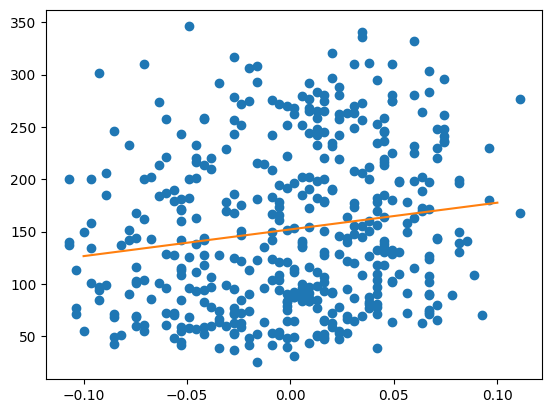

---------------------------------------------


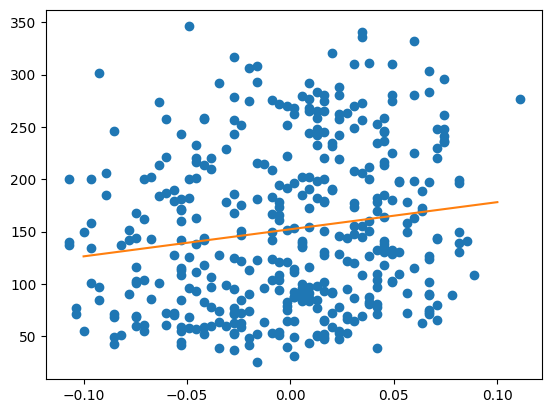

-----------------------------------------------------------------------------------


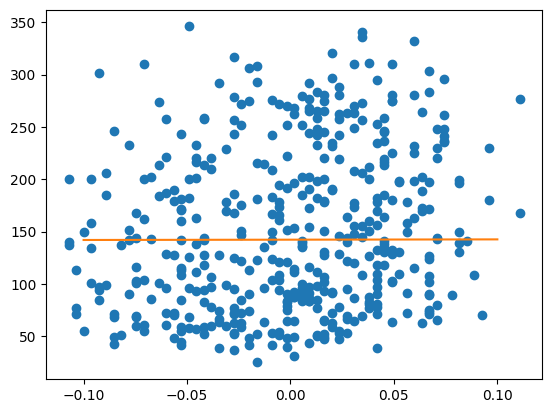

---------------------------------------------


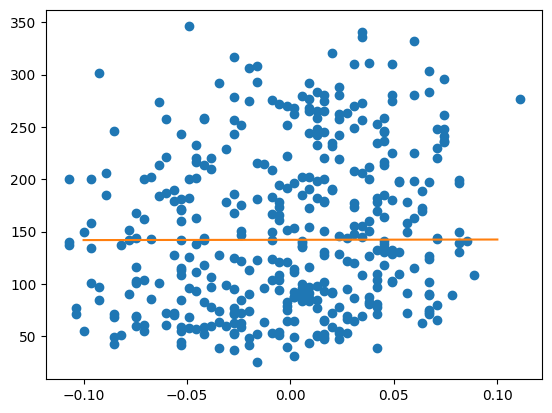

In [14]:
# once you have found out the optimal w,b plot the gradient function for [w-100,w+100] and [b-100,b+100]
# the shape of the curve is important in the convergence of the gradient descent

import matplotlib.pyplot as plt

plt.plot(X, Y, 'o')
zx = np.linspace(-0.1, 0.1, 100)
zy = linear_reg_function(zx,w_g,b_g)
plt.plot(zx,zy)
plt.show()


print("---------------------------------------------")

plt.plot(X_train, Y_train, 'o')
zx_t = np.linspace(-0.1, 0.1, 100)
zy_t = linear_reg_function(zx_t,w_t_g, b_t_g)
plt.plot(zx_t,zy_t)
plt.show()

print("-----------------------------------------------------------------------------------")

plt.plot(X, Y, 'o')
zx = np.linspace(-0.1, 0.1, 100)
zy = linear_reg_function(zx,w_i,b_i)
plt.plot(zx,zy)
plt.show()


print("---------------------------------------------")

plt.plot(X_train, Y_train, 'o')
zx_t = np.linspace(-0.1, 0.1, 100)
zy_t = linear_reg_function(zx_t,w_t_i,b_t_i)
plt.plot(zx_t,zy_t)
plt.show()


In [15]:
print("Linear Regression with Regularization")
print("---------------------------------------------")

print("Using Given Learning Rate")
learning_rate_given = 0.9

print("Using X as the feature and Y as the target")
w_g,b_g = gradient_descent_linear_reg_one_variable(X, Y, gradient_function_with_reg, learning_rate_given)
print("Weights:", w_g)
print("Bias:", b_g)
print("---------------")
cost_g = cost_function_with_reg(X, w_g, b_g, Y)
print("Cost:", cost_g)

print("---------------------------------------------")

print("Using X_train as the feature and y_train as the target")
w_t_g,b_t_g = gradient_descent_linear_reg_one_variable(X_train, Y_train, gradient_function_with_reg, learning_rate_given)
print("Weights:", w_t_g)
print("Bias:", b_t_g)
print("---------------")
cost_g_t = cost_function_with_reg(X_train, w_t_g, b_t_g, Y_train)
print("Cost:", cost_g_t)
print("---------------------------------------------")

print("Using Ideal Learning Rate")
learning_rate_ideal = 0.01

print("Using X as the feature and Y as the target")
w_i,b_i = gradient_descent_linear_reg_one_variable(X, Y, gradient_function_with_reg, learning_rate_ideal)
print("Weights:", w_i)
print("Bias:", b_i)
print("---------------")
cost_i = cost_function_with_reg(X, w_i, b_i, Y)
print("Cost:", cost_i)
print("---------------------------------------------")

print("Using X_train as the feature and y_train as the target")
w_t_i,b_t_i = gradient_descent_linear_reg_one_variable(X_train, Y_train, gradient_function_with_reg, learning_rate_ideal)
print("Weights:", w_t_g)
print("Bias:", b_t_g)
print("---------------")
cost_i_t = cost_function_with_reg(X_train, w_t_g, b_t_g, Y_train)
print("Cost:", cost_i_t)

Linear Regression with Regularization
---------------------------------------------
Using Given Learning Rate
Using X as the feature and Y as the target
Converged in  904 iterations...
Weights: 249.71866619059006
Bias: 152.13348416289594
---------------
Cost: 268.32102786073045
---------------------------------------------
Using X_train as the feature and y_train as the target
Converged in  928 iterations...
Weights: 252.48848492647983
Bias: 152.27259444930857
---------------
Cost: 238.77852379073585
---------------------------------------------
Using Ideal Learning Rate
Using X as the feature and Y as the target
Converged in  278 iterations...
Weights: 2.8924594438013855
Bias: 141.60304608176983
---------------
Cost: 923.2839913966038
---------------------------------------------
Using X_train as the feature and y_train as the target
Converged in  279 iterations...
Weights: 252.48848492647983
Bias: 152.27259444930857
---------------
Cost: 238.77852379073585


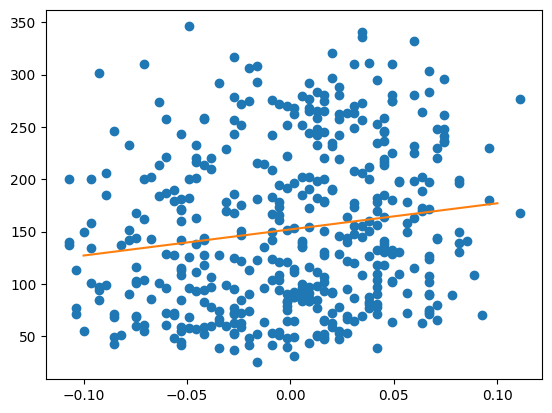

---------------------------------------------


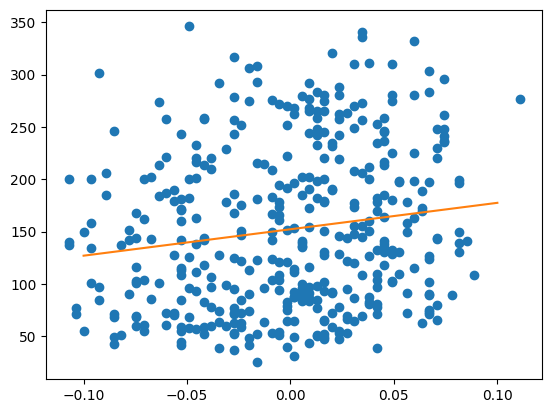

-----------------------------------------------------------------------------------


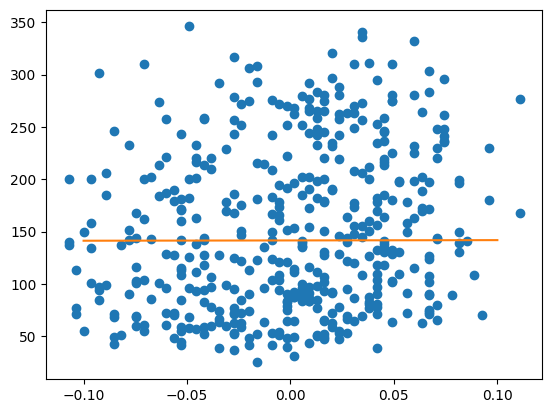

---------------------------------------------


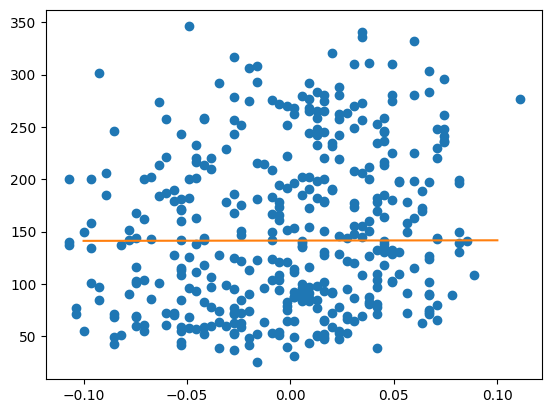

In [16]:
# once you have found out the optimal w,b plot the gradient function for [w-100,w+100] and [b-100,b+100]
# the shape of the curve is important in the convergence of the gradient descent

import matplotlib.pyplot as plt

plt.plot(X, Y, 'o')
zx = np.linspace(-0.1, 0.1, 100)
zy = linear_reg_function(zx,w_g,b_g)
plt.plot(zx,zy)
plt.show()


print("---------------------------------------------")

plt.plot(X_train, Y_train, 'o')
zx_t = np.linspace(-0.1, 0.1, 100)
zy_t = linear_reg_function(zx_t,w_t_g, b_t_g)
plt.plot(zx_t,zy_t)
plt.show()

print("-----------------------------------------------------------------------------------")

plt.plot(X, Y, 'o')
zx = np.linspace(-0.1, 0.1, 100)
zy = linear_reg_function(zx,w_i,b_i)
plt.plot(zx,zy)
plt.show()


print("---------------------------------------------")

plt.plot(X_train, Y_train, 'o')
zx_t = np.linspace(-0.1, 0.1, 100)
zy_t = linear_reg_function(zx_t,w_t_i,b_t_i)
plt.plot(zx_t,zy_t)
plt.show()


### Experminent 2 - Multiple linear regression
use more features and modify the code for more than 1 features

In [17]:
X_ml = re_df[['age','bmi']].to_numpy()
Y_ml = dataset.target.to_numpy()

# split the dataset into test and train
X_train_ml, X_test_ml, Y_train_ml, Y_test_ml = train_test_split(X_ml, Y_ml, test_size=0.1, random_state=42)

In [18]:
# Experiment 2 - Linear regression with multi variable
# Fill following functions
def linear_reg_function_multiple(X,w,b):
  """
  Model function for the multiple linear regression
  X is the feature Matrix "For example: f features and m samples"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight vector with length = f-12.892459443801385 141.60304608176983
  """

  return X*w + b

In [19]:
# Experiment 2 - Linear regression with multi variable
# Fill following functions

def cost_function_multiple(X,w,b,Y):
  """
  Cost function for the linear regression
  This is the function that will be minimised using gradient descent
  X is the feature Matrix "For example: f features and m samples"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight vector with length = f-1
  """
  cf_val = 0.0
  # Compute the cf_val = sum across all i : (wX_i + b)^2
  m = len(Y)
  for i in range(0,m):
    cf_val += (linear_reg_function_multiple(X[i], w, b) - Y[i]) ** 2
  cf_val /= (2*m)
  return cf_val

In [20]:
# Experiment 2 - Linear regression with multi variable
# Fill following functions

def cost_function_multiple_reg(X,w,b,Y, gamma=0.1):
  """
  Cost function for the linear regression
  This is the function that will be minimised using gradient descent
  X is the feature Matrix "For example: f features and m samples"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight vector with length = f-1
  """
  cf_val = 0.0
  # Compute the cf_val = sum across all i : (wX_i + b)^2
  m = len(Y)
  for i in range(0,m):
    cf_val += (linear_reg_function_multiple(X[i], w, b) - Y[i]) ** 2
  cf_val /= (2*m) + gamma*(w**2 + b**2)
  return cf_val

In [21]:
# Experiment 2 - Linear regression with multi variable
# Fill following functions

def gradient_function_multiple(X,w,b,Y):
  """
  Gradient function for the linear regression with one variable
  This is the function that will be used to get the gradient in gradient descent
  X is the feature Matrix "For example: f features and m samples"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight vector with length = f-1
  """

  grad_val_w = 0.0
  grad_val_b = 0.0
  m = len(Y)

  for i in range(0,m):
    grad_val_w += (linear_reg_function_multiple(X[i], w, b) - Y[i])*X[i]
    grad_val_b += (linear_reg_function_multiple(X[i], w, b) - Y[i])
  grad_val_w /= (m)
  grad_val_b /= (m)
  # Compute the grad_val_w, grad_val_b for the cost function

  return grad_val_w, grad_val_b

In [22]:
# Experiment 2 - Linear regression with multi variable
# Fill following functions

def gradient_function_multiple_reg(X,w,b,Y, gamma=0.1):
  """
  Gradient function for the linear regression with one variable
  This is the function that will be used to get the gradient in gradient descent
  X is the feature Matrix "For example: f features and m samples"
  Y is the target vector "For example: Price of the house"
  b is the bias
  w is the weight vector with length = f-1
  """

  grad_val_w = 0.0
  grad_val_b = 0.0
  m = len(Y)

  for i in range(0,m):
    grad_val_w += (linear_reg_function_multiple(X[i], w, b) - Y[i])*X[i]
    grad_val_b += (linear_reg_function_multiple(X[i], w, b) - Y[i])
  grad_val_w /= ((m) + 2*gamma*w)
  grad_val_b /= ((m) + 2*gamma*b)
  # Compute the grad_val_w, grad_val_b for the cost function

  return grad_val_w, grad_val_b

In [23]:
# Experiment 2 - Linear regression with multi variable
# Fill following functions

# the below function is a template you may edit it
def gradient_descent_linear_reg_multi_variable(X,Y, gradient, learning_rate, bias=1.0, weight=1.0, converge_param=0.001):
# Initialise w,b
  w = weight
  b = bias
  isConverged = False
  num_steps = 1
  while (not isConverged):
    num_steps +=1
    #cs_val = model_func(X,w,b,Y)
    dw, db = gradient(X,w,b,Y)
    w -= learning_rate*dw
    b -= learning_rate*db
    if all(abs(learning_rate * dw_i) < converge_param and abs(learning_rate * db_i) < converge_param for dw_i, db_i in zip(dw, db)):
      isConverged = True
    weight = w
    bias = b
  print("Converged in " , num_steps,  "iterations...")
  return w, b

# Similar to previous case, Test with different learning rates and start values and see how gradient descent works



In [24]:
# Test with different learning rates and start values and see how gradient descent works
print("Multiple Linear Regression without Regularization")
print("---------------------------------------------")

print("Using Given Learning Rate")
learning_rate_given = 0.9

print("Using X as the feature and Y as the target")
w_g,b_g = gradient_descent_linear_reg_multi_variable(X_ml, Y_ml, gradient_function_multiple, learning_rate_given)
print("Weights:", w_g)
print("Bias:", b_g)
print("---------------")
cost_g = cost_function_multiple(X, w_g, b_g, Y)
print("Cost:", cost_g)

print("---------------------------------------------")

print("Using X_train as the feature and y_train as the target")
w_t_g,b_t_g = gradient_descent_linear_reg_multi_variable(X_train_ml, Y_train_ml, gradient_function_multiple, learning_rate_given)
print("Weights:", w_t_g)
print("Bias:", b_t_g)
print("---------------")
cost_g_t = cost_function_multiple(X_train, w_t_g, b_t_g, Y_train)
print("Cost:", cost_g_t)
print("---------------------------------------------")

print("Using Ideal Learning Rate")
learning_rate_ideal = 0.5

print("Using X as the feature and Y as the target")
w_i,b_i = gradient_descent_linear_reg_multi_variable(X_ml, Y_ml, gradient_function_multiple, learning_rate_ideal)
print("Weights:", w_i)
print("Bias:", b_i)
print("---------------")
cost_i = cost_function_multiple(X, w_i, b_i, Y)
print("Cost:", cost_i)
print("---------------------------------------------")

print("Using X_train as the feature and y_train as the target")
w_t_i,b_t_i = gradient_descent_linear_reg_multi_variable(X_train_ml, Y_train_ml, gradient_function_multiple, learning_rate_ideal)
print("Weights:", w_t_i)
print("Bias:", b_t_i)
print("---------------")
cost_i_t = cost_function_multiple(X_train, w_t_i, b_t_i, Y_train)
print("Cost:", cost_i_t)


Multiple Linear Regression without Regularization
---------------------------------------------
Using Given Learning Rate
Using X as the feature and Y as the target
Converged in  3714 iterations...
Weights: [304.0264303  948.94523663]
Bias: [152.13348416 152.13348416]
---------------
Cost: [2860.27353636 3330.54301729]
---------------------------------------------
Using X_train as the feature and y_train as the target
Converged in  3805 iterations...
Weights: [309.67583462 955.12450583]
Bias: [152.33220592 152.09796376]
---------------
Cost: [2849.64854461 3303.78676108]
---------------------------------------------
Using Ideal Learning Rate
Using X as the feature and Y as the target
Converged in  6168 iterations...
Weights: [303.90107682 948.55309844]
Bias: [152.13348416 152.13348416]
---------------
Cost: [2860.27359856 3329.97116439]
---------------------------------------------
Using X_train as the feature and y_train as the target
Converged in  6316 iterations...
Weights: [309.536

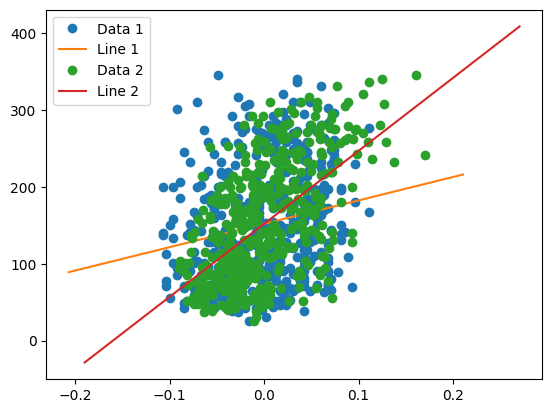

---------------------------------------------


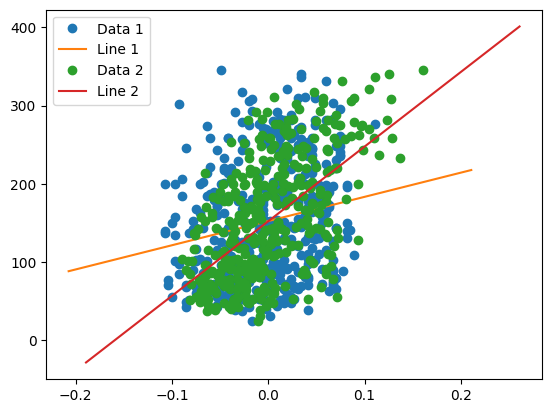

-----------------------------------------------------------------------------------


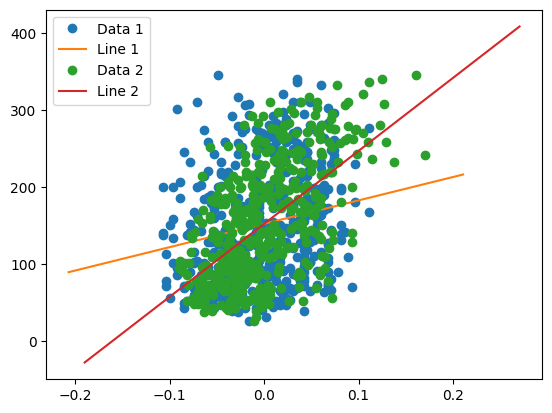

---------------------------------------------


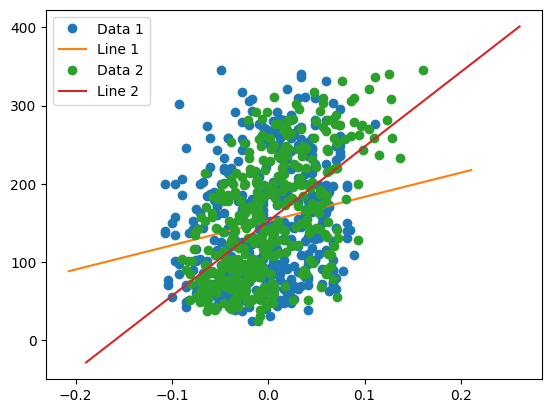

In [25]:
# once you have found out the optimal w,b plot the gradient function for [w-100,w+100] and [b-100,b+100]
# the shape of the curve is important in the convergence of the gradient descent

for i in range(len(w_g)):
    plt.plot(X_ml[:, i], Y_ml, 'o', label=f'Data {i+1}')

    zx_ml = np.linspace(np.min(X_ml[:, i]) - 0.1, np.max(X_ml[:, i]) + 0.1, 100)
    zy_ml = linear_reg_function_multiple(zx_ml, w_g[i], b_g[i])
    plt.plot(zx_ml, zy_ml, label=f'Line {i+1}')

plt.legend()
plt.show()


print("---------------------------------------------")

for i in range(len(w_t_g)):
    plt.plot(X_train_ml[:, i], Y_train_ml, 'o', label=f'Data {i+1}')

    zx_t_ml = np.linspace(np.min(X_train_ml[:, i]) - 0.1, np.max(X_train_ml[:, i]) + 0.1, 100)
    zy_t_ml = linear_reg_function_multiple(zx_t_ml, w_t_g[i], b_t_g[i])
    plt.plot(zx_t_ml, zy_t_ml, label=f'Line {i+1}')

plt.legend()
plt.show()

print("-----------------------------------------------------------------------------------")

for i in range(len(w_i)):
    plt.plot(X_ml[:, i], Y_ml, 'o', label=f'Data {i+1}')

    zx_ml = np.linspace(np.min(X_ml[:, i]) - 0.1, np.max(X_ml[:, i]) + 0.1, 100)
    zy_ml = linear_reg_function_multiple(zx_ml, w_i[i], b_i[i])
    plt.plot(zx_ml, zy_ml, label=f'Line {i+1}')

plt.legend()
plt.show()


print("---------------------------------------------")


for i in range(len(w_t_i)):
    plt.plot(X_train_ml[:, i], Y_train_ml, 'o', label=f'Data {i+1}')

    zx_t_ml = np.linspace(np.min(X_train_ml[:, i]) - 0.1, np.max(X_train_ml[:, i]) + 0.1, 100)
    zy_t_ml = linear_reg_function_multiple(zx_t_ml, w_t_i[i], b_t_i[i])
    plt.plot(zx_t_ml, zy_t_ml, label=f'Line {i+1}')

plt.legend()
plt.show()



In [26]:
# Test with different learning rates and start values and see how gradient descent works
print("Multiple Linear Regression with Regularization")
print("---------------------------------------------")

print("Using Given Learning Rate")
learning_rate_given = 0.9

print("Using X as the feature and Y as the target")
w_g,b_g = gradient_descent_linear_reg_multi_variable(X_ml, Y_ml, gradient_function_multiple_reg, learning_rate_given)
print("Weights:", w_g)
print("Bias:", b_g)
print("---------------")
cost_g = cost_function_multiple_reg(X, w_g, b_g, Y)
print("Cost:", cost_g)

print("---------------------------------------------")

print("Using X_train as the feature and y_train as the target")
w_t_g,b_t_g = gradient_descent_linear_reg_multi_variable(X_train_ml, Y_train_ml, gradient_function_multiple_reg, learning_rate_given)
print("Weights:", w_t_g)
print("Bias:", b_t_g)
print("---------------")
cost_g_t = cost_function_multiple_reg(X_train, w_t_g, b_t_g, Y_train)
print("Cost:", cost_g_t)
print("---------------------------------------------")

print("Using Ideal Learning Rate")
learning_rate_ideal = 0.5

print("Using X as the feature and Y as the target")
w_i,b_i = gradient_descent_linear_reg_multi_variable(X_ml, Y_ml, gradient_function_multiple_reg, learning_rate_ideal)
print("Weights:", w_i)
print("Bias:", b_i)
print("---------------")
cost_i = cost_function_multiple_reg(X, w_i, b_i, Y)
print("Cost:", cost_i)
print("---------------------------------------------")

print("Using X_train as the feature and y_train as the target")
w_t_i,b_t_i = gradient_descent_linear_reg_multi_variable(X_train_ml, Y_train_ml, gradient_function_multiple_reg, learning_rate_ideal)
print("Weights:", w_t_i)
print("Bias:", b_t_i)
print("---------------")
cost_i_t = cost_function_multiple_reg(X_train, w_t_i, b_t_i, Y_train)
print("Cost:", cost_i_t)


Multiple Linear Regression with Regularization
---------------------------------------------
Using Given Learning Rate
Using X as the feature and Y as the target
Converged in  4849 iterations...
Weights: [304.13763644 948.73449218]
Bias: [152.13348416 152.13348416]
---------------
Cost: [203.116522    31.58444378]
---------------------------------------------
Using X_train as the feature and y_train as the target
Converged in  5101 iterations...
Weights: [309.80535685 954.8814432 ]
Bias: [152.33234095 152.09794139]
---------------
Cost: [177.98464477  27.81856053]
---------------------------------------------
Using Ideal Learning Rate
Using X as the feature and Y as the target
Converged in  7988 iterations...
Weights: [304.0879181  948.17376079]
Bias: [152.13348416 152.13348416]
---------------
Cost: [203.16587601  31.61276732]
---------------------------------------------
Using X_train as the feature and y_train as the target
Converged in  8393 iterations...
Weights: [309.75341634 954

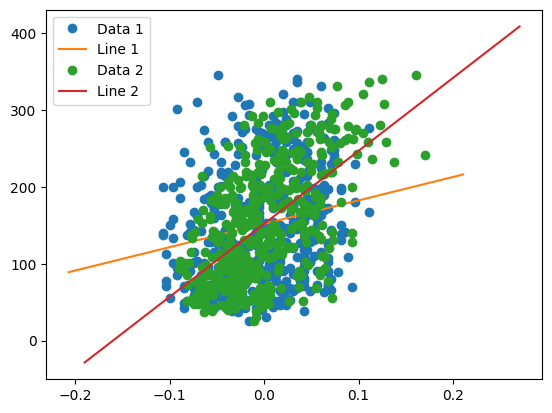

---------------------------------------------


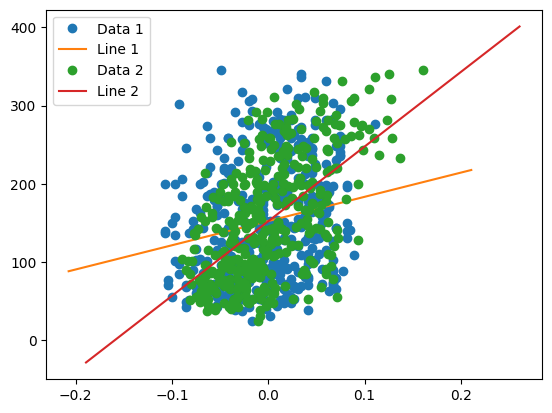

-----------------------------------------------------------------------------------


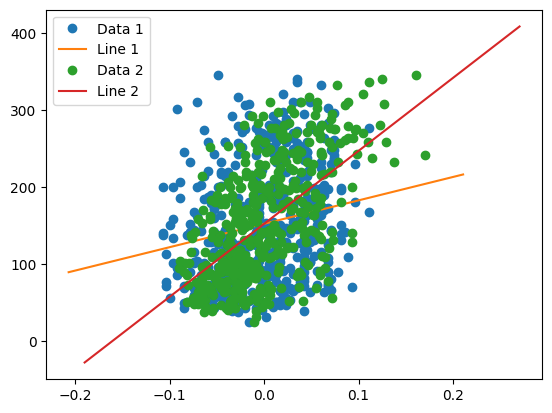

---------------------------------------------


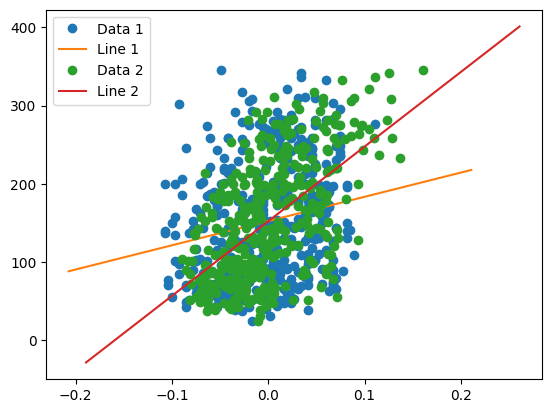

In [27]:
# once you have found out the optimal w,b plot the gradient function for [w-100,w+100] and [b-100,b+100]
# the shape of the curve is important in the convergence of the gradient descent

for i in range(len(w_g)):
    plt.plot(X_ml[:, i], Y_ml, 'o', label=f'Data {i+1}')

    zx_ml = np.linspace(np.min(X_ml[:, i]) - 0.1, np.max(X_ml[:, i]) + 0.1, 100)
    zy_ml = linear_reg_function_multiple(zx_ml, w_g[i], b_g[i])
    plt.plot(zx_ml, zy_ml, label=f'Line {i+1}')

plt.legend()
plt.show()


print("---------------------------------------------")

for i in range(len(w_t_g)):
    plt.plot(X_train_ml[:, i], Y_train_ml, 'o', label=f'Data {i+1}')

    zx_t_ml = np.linspace(np.min(X_train_ml[:, i]) - 0.1, np.max(X_train_ml[:, i]) + 0.1, 100)
    zy_t_ml = linear_reg_function_multiple(zx_t_ml, w_t_g[i], b_t_g[i])
    plt.plot(zx_t_ml, zy_t_ml, label=f'Line {i+1}')

plt.legend()
plt.show()

print("-----------------------------------------------------------------------------------")

for i in range(len(w_i)):
    plt.plot(X_ml[:, i], Y_ml, 'o', label=f'Data {i+1}')

    zx_ml = np.linspace(np.min(X_ml[:, i]) - 0.1, np.max(X_ml[:, i]) + 0.1, 100)
    zy_ml = linear_reg_function_multiple(zx_ml, w_i[i], b_i[i])
    plt.plot(zx_ml, zy_ml, label=f'Line {i+1}')

plt.legend()
plt.show()


print("---------------------------------------------")


for i in range(len(w_t_i)):
    plt.plot(X_train_ml[:, i], Y_train_ml, 'o', label=f'Data {i+1}')

    zx_t_ml = np.linspace(np.min(X_train_ml[:, i]) - 0.1, np.max(X_train_ml[:, i]) + 0.1, 100)
    zy_t_ml = linear_reg_function_multiple(zx_t_ml, w_t_i[i], b_t_i[i])
    plt.plot(zx_t_ml, zy_t_ml, label=f'Line {i+1}')

plt.legend()
plt.show()



# Experiment 3 (Optional)
Instead of using gradient descent there is another technique which uses the covariance matrix and linear algebra techniques.
1. Survey through and find out what that method is.
2. Find out the reason why the method is not widely used?

Ordinart Least Squares (OLS) is the another technique which uses the covariance matrix and linear algebra techniques

In [28]:
def o_l_s(X, Y):
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y
    return theta[0], theta[1:]

In [29]:
def linear_regression_ols(X, Y, o_l_s, learning_rate, bias = 1.0, weight = 1.0, converge_param=0.001):
    X_b = np.column_stack((np.ones_like(X), X))
    w = weight
    b = bias
    isConverged = False
    num_steps = 1
    while (not isConverged):
      num_steps += 1
      db, dw = o_l_s(X_b,Y)
      w -= learning_rate*dw
      b -= learning_rate*db
      if abs(learning_rate * dw) < converge_param and abs(learning_rate * db) < converge_param:
        isConverged = True
      weight = w
      bias = b
    print("Converged in " , num_steps,  "iterations...")
    return w, b


While Ordinary Least Squares (OLS) is a powerful and intuitive method for linear regression, it has several limitations and drawbacks that make it less widely used in certain scenarios:

1. **Computational Complexity**: OLS involves matrix inversion, which has a computational complexity of O(n^3), where n is the number of features. This makes it computationally expensive, especially for large datasets with a high number of features.

2. **Sensitivity to Outliers**: OLS is sensitive to outliers in the data. Outliers can heavily influence the estimation of the regression coefficients, leading to biased parameter estimates.

3. **Overfitting**: OLS can overfit the training data if the number of features is large compared to the number of observations. This can result in poor generalization performance on unseen data.

4. **Multicollinearity**: OLS can produce unstable estimates when the independent variables are highly correlated (multicollinearity). This can lead to inflated standard errors and difficulties in interpreting the coefficients.

5. **Non-linearity**: OLS is limited to linear relationships between the independent and dependent variables. If the relationship is non-linear, OLS may not capture the true underlying pattern in the data.